In [1]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# pro = ts.pro_api('')
# ts.set_token('') 
ts.set_token('')
# 初始化接口
ts_api = ts.pro_api()
#2.定义列表，存储你需要分析的股票代号
ts_codes = ['600104.SH','300750.SZ', '601633.SH','000625.SZ','002594.SZ']
#3.遍历每只股票、读取相应数据并进行保存。
for ts_code in ts_codes:
    data = ts_api. daily(ts_code=ts_code, start_date= '20210617', end_date='20220617')
    if(ts_code=="600104.SH"):
        data[['ts_code','trade_date','close']].to_csv('zuhe.csv',mode='a')
    else:
        data[['ts_code','trade_date','close']].to_csv('zuhe.csv',mode= 'a',header=False)


In [3]:
df = pd.read_csv('zuhe.csv')
df.drop(df.columns[0], axis=1, inplace=True) #表格数据中的第一列删除；
two_level_index_series = df.set_index(["trade_date", "ts_code"])["close"] #将交易日期trade_date、股票代号ts_code设定位复合
new_df = two_level_index_series.unstack()
new_df.to_csv("new_zuhe.csv")

<AxesSubplot:xlabel='trade_date'>

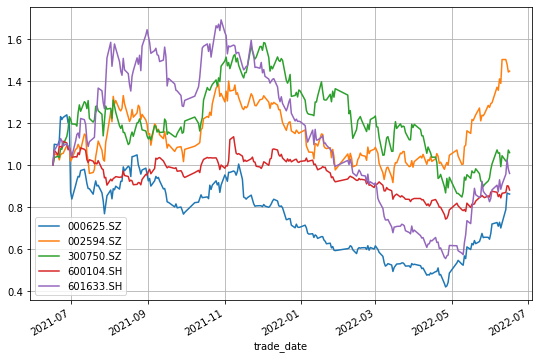

In [7]:
stock_price=pd.read_csv('new_zuhe.csv',
parse_dates = ['trade_date'], index_col = ['trade_date']).iloc[:,:]
(stock_price/stock_price.iloc[0]).plot(figsize=(9,6),grid=True)

In [8]:

stock_return=np.log(stock_price/stock_price.shift(1))#股票平均年化收益率
return_mean=stock_return.mean()*252#股票年化收益波动率
return_volatility=stock_return.std()*np.sqrt(252)#计算每只股票收益率之间的协方差
return_cov=stock_return.cov()*252#计算每只股票收益率之间的相关系数
return_corr=stock_return.corr()

/Users/drpb/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25237 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/drpb/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36164 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/drpb/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/drpb/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/drpb/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/drpb/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backe

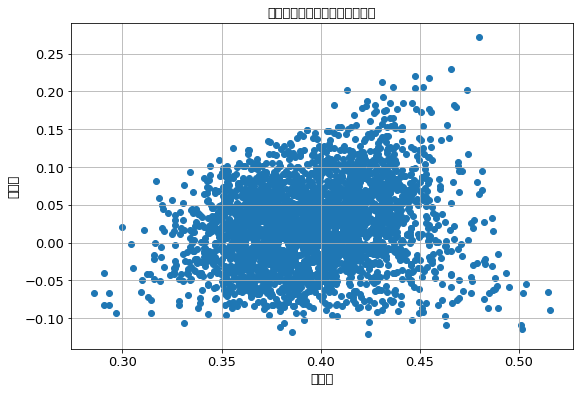

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei']
x_3000=np.random.random((len(return_mean.index),3000))
#生成包含3000组的随机权重的数组
w_3000=x_3000/np.sum(x_3000,axis=0)
Rp_3000=np.dot(return_mean,w_3000)#生成存放投资组合 3000 个不同收益波动率的初始化数组
Vp_3000=np.zeros_like(Rp_3000)#通过for计算3000个不同收益波动率
for i in range(len(Rp_3000)):
    Vp_3000[i]=np.sqrt(np.dot((w_3000.T)[i],np.dot(return_cov,w_3000[:,i]))) #绘制投资组合收益率与波动率的关系图
plt.figure(figsize=(9,6))
plt.scatter(Vp_3000,Rp_3000)
plt.xlabel('波动率',fontsize=13)
plt.ylabel('收益率',fontsize=13,rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('投资组合收益率与波动率关系图',fontsize=13)
plt.grid('True')
plt.show()